## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline


## Generate data

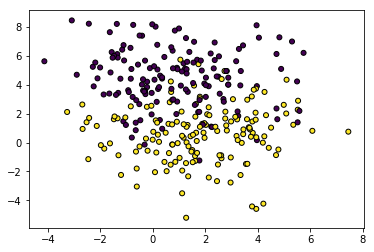

In [16]:
# generate data for classification test
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std = 2.0,random_state=0) # 300 samples
plt.scatter(X[:,0],X[:,1], marker='o', s=25, edgecolor='k', c=y)

## Build KNN model with 1 neighbor

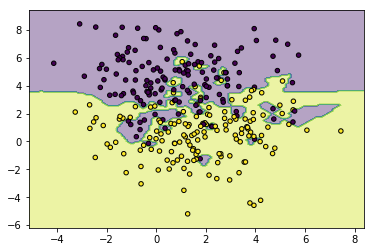

In [17]:
# build a 1-KNN model
from sklearn.neighbors import KNeighborsClassifier

# Plotting decision regions
def plot_knn_boundary(X,y,clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X,y)
plot_knn_boundary(X,y,clf1)

## Build KNN model with 10 neighbors

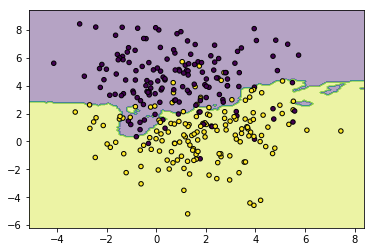

In [18]:
clf10 = KNeighborsClassifier(n_neighbors=10)
clf10.fit(X,y)
plot_knn_boundary(X,y,clf10)

## Variation in train and test accuracy with k

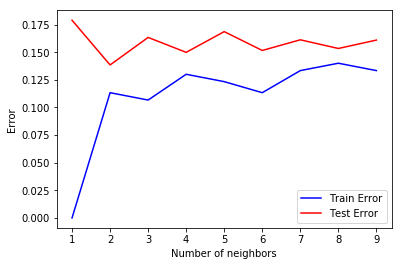

In [20]:
train_accuracy =np.zeros((10,))
test_accuracy = np.zeros((10,))

Xtest, ytest = make_blobs(n_samples=20000, centers=2, n_features=2, cluster_std = 2.0,random_state=3)

for k in range(1,10):
   
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    train_accuracy[k] = 1.0 - knn.score(X, y)
    test_accuracy[k] = 1.0 - knn.score(Xtest, ytest) 
    
plt.plot(range(1,10),train_accuracy[1:10],'b',label='Train Error')
plt.plot(range(1,10),test_accuracy[1:10],'r',label='Test Error')
plt.legend(loc ='lower right')
plt.xlabel('Number of neighbors') 
plt.ylabel('Error')
plt.show()